# **Capstone II Exploratory Data Analysis**

In this section we 'manually' explore our data. What kind of relationships between independent and dependent variables can we find without the aid of sophisticated modeling? We go into this project with some expectations. For example, we expect to see both higher cholesterol values and the two anginal chest pains correlated with heart disease.

Exploring the data in this way can lead to a more focused approach when it comes to the modeling sections. By learning about our data, we also learn what we should do with our data.

## **Section 1: Imports and Loading Data**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# Bring in both versions of our data set, the one where we dropped all the patient records with 0 for cholesterol, and the
# version where we imputed median value.
df = pd.read_csv("..\Data\heart_data_cleaned.csv")
df_dropped_chol = pd.read_csv("..\Data\heart_data_dropped_chol.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape, df_dropped_chol.shape

((917, 12), (746, 12))

## **Section 2: Single Variable Comparison**

Our **dependent variable** is **HeartDisease** (1 for heart disease, 0 for no heart disease). This is the variable we'd like to predict. We will eventually use the logistic regression model to predict heart disease because this is the type of model that is appropriate for predicting categorical events, like whether someone has suffered heart disease or not. But for now, we will generate a number of figures to visually assess the relationship between each of the independent variables and incidence of heart disease. We will rely on seaborn's categorical plotting visualizations, since our target variable is categorical.

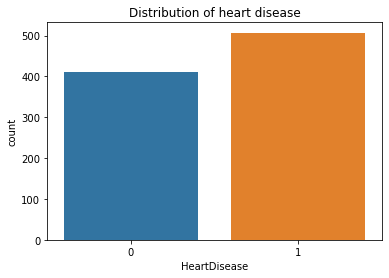

In [5]:
#About 100 more people suffered HD than didn't.
sns.countplot('HeartDisease', data = df)
plt.title('Distribution of heart disease')
plt.show()

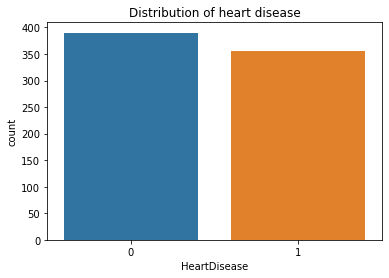

In [6]:
# And the smaller version of the data set tips the proportion in the other direction.
sns.countplot('HeartDisease', data = df_dropped_chol)
plt.title('Distribution of heart disease')
plt.show()

In [7]:
print((df['HeartDisease'] == 0).sum(), 'people did not have heart disease.', 
      (df['HeartDisease'] == 1).sum(), 'people did have heart disease.')

410 people did not have heart disease. 507 people did have heart disease.


In [8]:
print('And without the data from Switzerland,', (df_dropped_chol['HeartDisease'] == 0).sum(), 
      'people did not have heart disease.', 
      (df_dropped_chol['HeartDisease'] == 1).sum(), 'people did have heart disease.')

And without the data from Switzerland, 390 people did not have heart disease. 356 people did have heart disease.


### **2a: Heart Disease vs. Age**

In this dataset heart disease tended to happen at a later age. This is what we'd expect to see.

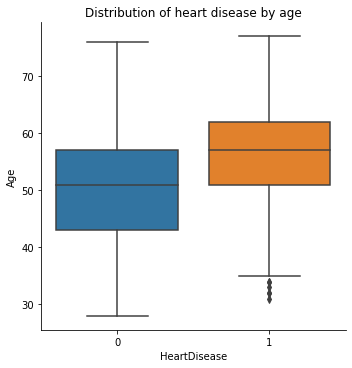

In [9]:
sns.catplot(data = df, x = 'HeartDisease', y = 'Age', kind = 'box')
plt.title('Distribution of heart disease by age')
plt.show()

In [10]:
#summary statistics for Age grouped by heart disease
a = (df[df['HeartDisease'] == 0]['Age']).describe().round(2)
b = (df[df['HeartDisease'] == 1]['Age']).describe().round(2)
table = pd.DataFrame(data = {'Sum stats no HD': a, 'Sum stats HD': b}, )
table

,Sum stats no HD,Sum stats HD
count,410.00,507.00
mean,50.55,55.90
std,9.44,8.74
min,28.00,31.00
25%,43.00,51.00
50%,51.00,57.00
75%,57.00,62.00
max,76.00,77.00


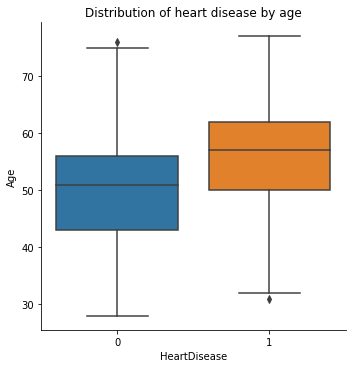

In [11]:
# Doesn't look much different without the Swiss data
sns.catplot(data = df_dropped_chol, x = 'HeartDisease', y = 'Age', kind = 'box')
plt.title('Distribution of heart disease by age')
plt.show()

In [12]:
a = (df_dropped_chol[df_dropped_chol['HeartDisease'] == 0]['Age']).describe().round(2)
b = (df_dropped_chol[df_dropped_chol['HeartDisease'] == 1]['Age']).describe().round(2)
table = pd.DataFrame(data = {'Sum stats no HD': a, 'Sum stats HD': b}, )
table

,Sum stats no HD,Sum stats HD
count,390.00,356.00
mean,50.17,55.85
std,9.31,8.82
min,28.00,31.00
25%,43.00,50.00
50%,51.00,57.00
75%,56.00,62.00
max,76.00,77.00


### **2b: Heart Disease vs. Sex**

Considerably more males suffered heart disease than females did, though males are also far more numerous in this dataset.

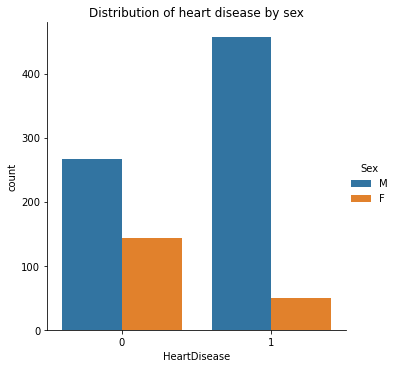

In [13]:
# Complete data set.
sns.catplot(data = df, x = 'HeartDisease', hue = 'Sex', kind = 'count')
plt.title('Distribution of heart disease by sex')
plt.show()

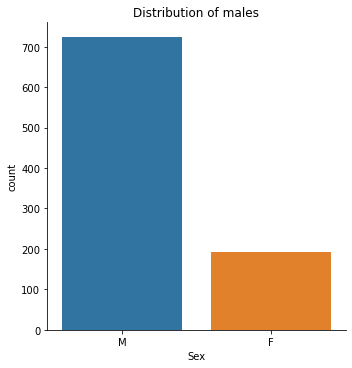

In [14]:
sns.catplot(data = df, x = 'Sex', kind = 'count')
plt.title('Distribution of males')
plt.show()

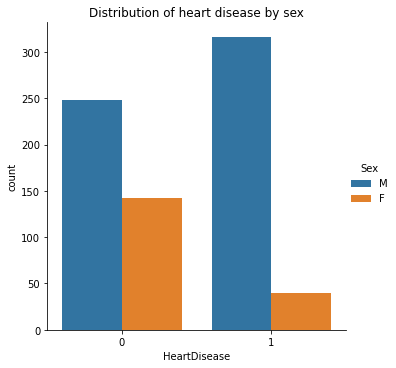

In [15]:
# Without Swiss data.
sns.catplot(data = df_dropped_chol, x = 'HeartDisease', hue = 'Sex', kind = 'count')
plt.title('Distribution of heart disease by sex')
plt.show()

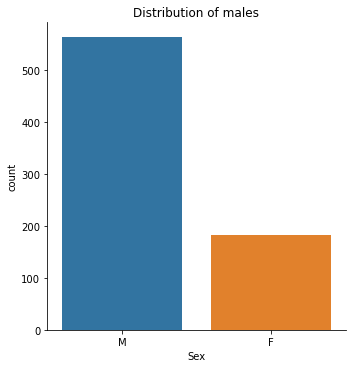

In [16]:
sns.catplot(data = df_dropped_chol, x = 'Sex', kind = 'count')
plt.title('Distribution of males')
plt.show()

In [17]:
#Table for proportion of males and females in the entire sample and grouped by heart disease
prop_m, prop_f = (np.sum(df['Sex'] == 'M') / len(df) * 100).round(2), (np.sum(df['Sex'] == 'F') / len(df) * 100).round(2)
prop_m_hd = (np.sum(df[df['HeartDisease'] == 1]['Sex'] == 'M') / len(df[df['HeartDisease'] == 1]) * 100).round(2)
prop_f_hd = (np.sum(df[df['HeartDisease'] == 1]['Sex'] == 'F') / len(df[df['HeartDisease'] == 1]) * 100).round(2)

data = {'Males': [prop_m, prop_m_hd], 'Females': [prop_f, prop_f_hd]}
index = ['Proportion of sample', 'Proportion of heart disease']

table = pd.DataFrame(data = data, index = index)
table

,Males,Females
Proportion of sample,78.95,21.05
Proportion of heart disease,90.14,9.86


In [18]:
# And again, without the Swiss data. The Swiss data brings the proportion of males and females to be
# more equal, but not by much.
prop_m = (np.sum(df_dropped_chol['Sex'] == 'M') / len(df_dropped_chol) * 100).round(2)
prop_f = (np.sum(df_dropped_chol['Sex'] == 'F') / len(df_dropped_chol) * 100).round(2)
prop_m_hd = (np.sum(df_dropped_chol[df_dropped_chol['HeartDisease'] == 1]['Sex'] == 'M') / 
             len(df_dropped_chol[df_dropped_chol['HeartDisease'] == 1]) * 100).round(2)
prop_f_hd = (np.sum(df_dropped_chol[df_dropped_chol['HeartDisease'] == 1]['Sex'] == 'F') / 
             len(df_dropped_chol[df_dropped_chol['HeartDisease'] == 1]) * 100).round(2)

data = {'Males': [prop_m, prop_m_hd], 'Females': [prop_f, prop_f_hd]}
index = ['Proportion of sample', 'Proportion of heart disease']

table = pd.DataFrame(data = data, index = index)
table

,Males,Females
Proportion of sample,75.60,24.40
Proportion of heart disease,88.76,11.24


### **2c: Heart Disease vs. Chest Pain Type**

I am surprised to see that of the people who did suffer a heart disease, the vast majority of them experienced asymptomatic chest pain! I take this to mean they didn't feel chest pain at all, or any kind of pain typically symptomatic of a heart disease. Perhaps chest pain is NOT a good predictor of heart disease. 

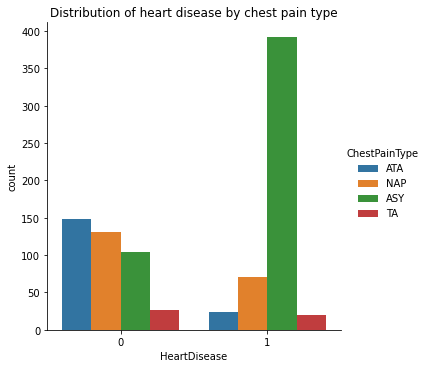

In [19]:
# Full dataset.
sns.catplot(data = df, x = 'HeartDisease', hue = 'ChestPainType', kind = 'count')
plt.title('Distribution of heart disease by chest pain type')
plt.show()

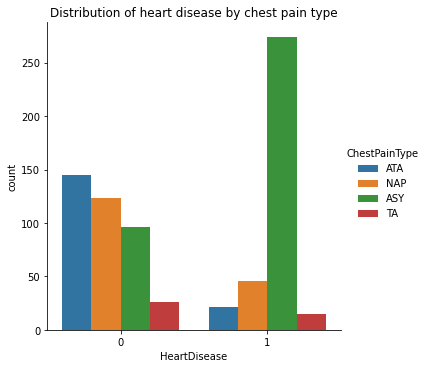

In [20]:
# Without Swiss data. Doesn't change much.
sns.catplot(data = df_dropped_chol, x = 'HeartDisease', hue = 'ChestPainType', kind = 'count')
plt.title('Distribution of heart disease by chest pain type')
plt.show()

### **2d: Heart Disease vs. Cholesterol**

Again, surprisingly, cholesterol seems to be completely uncorrelated with heart disease! People who suffered a heart disease have a slightly higher IQR and average cholesterol. They also have a few more outliers and a slightly greater range of values.

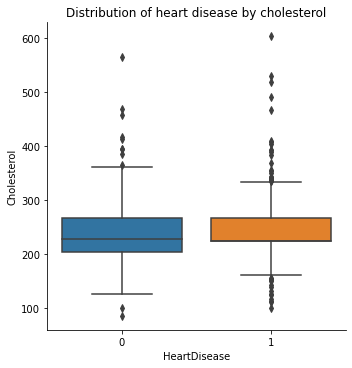

In [21]:
# Full dataset.
sns.catplot(data = df, x = 'HeartDisease', y = 'Cholesterol', kind = 'box')
plt.title('Distribution of heart disease by cholesterol')
plt.show()

In [22]:
#summary statistics for cholesterol grouped by heart disease
a = (df[df['HeartDisease'] == 0]['Cholesterol']).describe().round(2)
b = (df[df['HeartDisease'] == 1]['Cholesterol']).describe().round(2)
table = pd.DataFrame(data = {'Sum stats no HD': a, 'Sum stats HD': b}, )
table

,Sum stats no HD,Sum stats HD
count,410.00,507.00
mean,238.00,242.70
std,54.13,53.87
min,85.00,100.00
25%,204.00,223.00
50%,227.00,223.00
75%,266.75,267.00
max,564.00,603.00


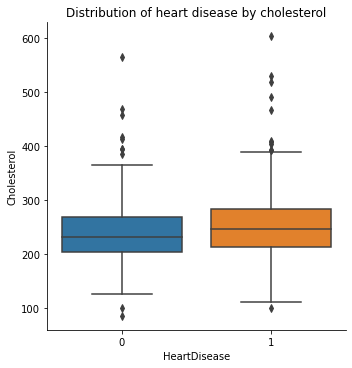

In [23]:
# Without Swiss data. The average cholesterol of heart disease is brought up an appreciable amount.
sns.catplot(data = df_dropped_chol, x = 'HeartDisease', y = 'Cholesterol', kind = 'box')
plt.title('Distribution of heart disease by cholesterol')
plt.show()

In [24]:
# Summary statistics without cholesterol
a = (df_dropped_chol[df_dropped_chol['HeartDisease'] == 0]['Cholesterol']).describe().round(2)
b = (df_dropped_chol[df_dropped_chol['HeartDisease'] == 1]['Cholesterol']).describe().round(2)
table = pd.DataFrame(data = {'Sum stats no HD': a, 'Sum stats HD': b}, )
table

,Sum stats no HD,Sum stats HD
count,390.00,356.00
mean,238.77,251.06
std,55.39,62.46
min,85.00,100.00
25%,203.00,212.00
50%,231.50,246.00
75%,269.00,283.25
max,564.00,603.00


### **2e: Heart Disease vs. Fasting Blood Sugar Level**

The majority of heart disease sufferers had a fasting blood sugar level below 120 mg/dl. The proportion of people with fasting blood sugar levels below 120 in the no heart disease category isn't too far off from those that did have heart disease. The difference is only 12%.

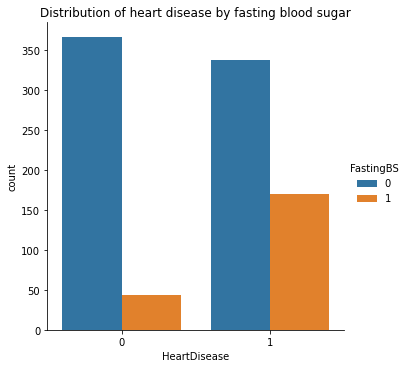

In [25]:
# Whole data set.
sns.catplot(data = df, x = 'HeartDisease', hue = 'FastingBS', kind = 'count')
plt.title('Distribution of heart disease by fasting blood sugar')
plt.show()

In [26]:
#Table of fasting blood sugar level proportions with and without heart disease
prop_below = (np.sum(df[df['HeartDisease'] == 0]['FastingBS'] == 0) / len(df[df['HeartDisease'] == 0]) * 100).round(2)
prop_above = (np.sum(df[df['HeartDisease'] == 0]['FastingBS'] == 1) / len(df[df['HeartDisease'] == 0]) * 100).round(2)
prop_b_hd = (np.sum(df[df['HeartDisease'] == 1]['FastingBS'] == 0) / len(df[df['HeartDisease'] == 1]) * 100).round(2)
prop_a_hd = (np.sum(df[df['HeartDisease'] == 1]['FastingBS'] == 1) / len(df[df['HeartDisease'] == 1]) * 100).round(2)

data = {'<120 Fasting BS': [prop_below, prop_b_hd], '>120 Fasting BS': [prop_above, prop_a_hd]}
index = ['Proportion no heart disease', 'Proportion with heart disease']

table = pd.DataFrame(data = data, index = index)
table

,<120 Fasting BS,>120 Fasting BS
Proportion no heart disease,89.27,10.73
Proportion with heart disease,66.47,33.53


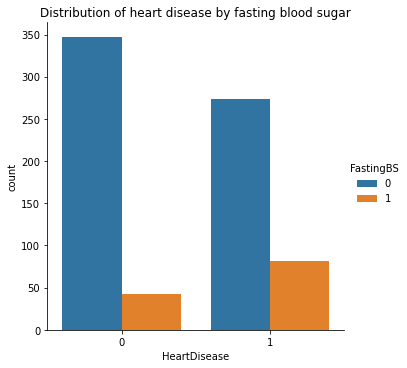

In [27]:
# Sans Swiss.
sns.catplot(data = df_dropped_chol, x = 'HeartDisease', hue = 'FastingBS', kind = 'count')
plt.title('Distribution of heart disease by fasting blood sugar')
plt.show()

In [28]:
# Sans Swiss. Among heart disease havers, the proportion of people below 120 fasting BS increased by about 10%,
# while the heart disease havers with over 120 fasting BS decreased by about 10%. Seems the Swiss have good
# resting blood sugar levels.
prop_below = (np.sum(df_dropped_chol[df_dropped_chol['HeartDisease'] == 0]['FastingBS'] == 0) / 
              len(df_dropped_chol[df_dropped_chol['HeartDisease'] == 0]) * 100).round(2)
prop_above = (np.sum(df_dropped_chol[df_dropped_chol['HeartDisease'] == 0]['FastingBS'] == 1) / 
              len(df_dropped_chol[df_dropped_chol['HeartDisease'] == 0]) * 100).round(2)
prop_b_hd = (np.sum(df_dropped_chol[df_dropped_chol['HeartDisease'] == 1]['FastingBS'] == 0) / 
             len(df_dropped_chol[df_dropped_chol['HeartDisease'] == 1]) * 100).round(2)
prop_a_hd = (np.sum(df_dropped_chol[df_dropped_chol['HeartDisease'] == 1]['FastingBS'] == 1) / 
             len(df_dropped_chol[df_dropped_chol['HeartDisease'] == 1]) * 100).round(2)

data = {'<120 Fasting BS': [prop_below, prop_b_hd], '>120 Fasting BS': [prop_above, prop_a_hd]}
index = ['Proportion no heart disease', 'Proportion with heart disease']

table = pd.DataFrame(data = data, index = index)
table

,<120 Fasting BS,>120 Fasting BS
Proportion no heart disease,88.97,11.03
Proportion with heart disease,76.97,23.03


### **2f: Heart Disease vs. Resting ECG**

Most resting ecgs were normal.

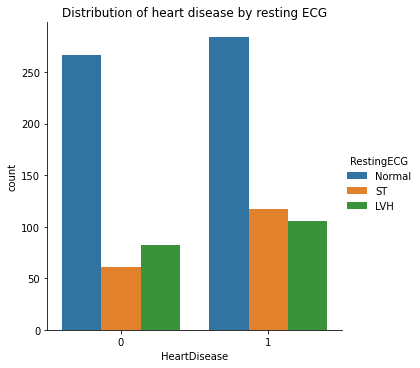

In [29]:
# With Swiss.
sns.catplot(data = df, x = 'HeartDisease', hue = 'RestingECG', kind = 'count')
plt.title('Distribution of heart disease by resting ECG')
plt.show()

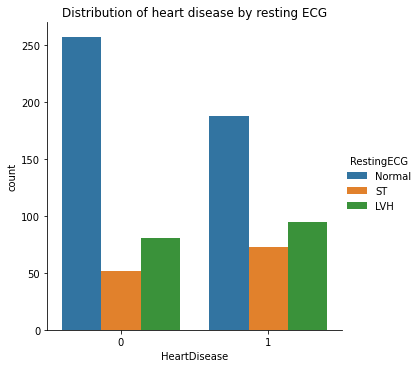

In [30]:
# Without Swiss.
sns.catplot(data = df_dropped_chol, x = 'HeartDisease', hue = 'RestingECG', kind = 'count')
plt.title('Distribution of heart disease by resting ECG')
plt.show()

### **2g: Heart Disease vs. Maximum Heart Rate Achieved**

Heart disease sufferers in general have a lower maximum heart rate achieved.

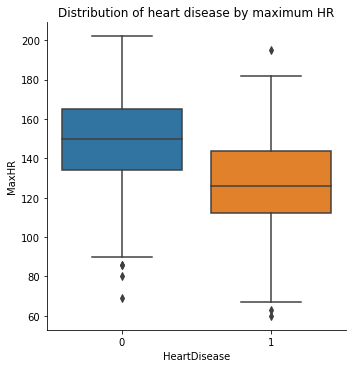

In [31]:
# Complete data set.
sns.catplot(data = df, x = 'HeartDisease', y = 'MaxHR', kind = 'box')
plt.title('Distribution of heart disease by maximum HR')
plt.show()

In [32]:
#summary statistics for max heart rate grouped by heart disease
a = (df[df['HeartDisease'] == 0]['MaxHR']).describe().round(2)
b = (df[df['HeartDisease'] == 1]['MaxHR']).describe().round(2)
table = pd.DataFrame(data = {'Sum stats no HD': a, 'Sum stats HD': b}, )
table

,Sum stats no HD,Sum stats HD
count,410.00,507.00
mean,148.15,127.60
std,23.29,23.38
min,69.00,60.00
25%,134.00,112.00
50%,150.00,126.00
75%,165.00,144.00
max,202.00,195.00


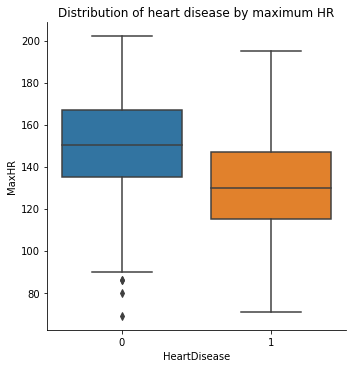

In [33]:
# Without Swiss.
sns.catplot(data = df_dropped_chol, x = 'HeartDisease', y = 'MaxHR', kind = 'box')
plt.title('Distribution of heart disease by maximum HR')
plt.show()

In [34]:
# Without Swiss.
a = (df_dropped_chol[df_dropped_chol['HeartDisease'] == 0]['MaxHR']).describe().round(2)
b = (df_dropped_chol[df_dropped_chol['HeartDisease'] == 1]['MaxHR']).describe().round(2)
table = pd.DataFrame(data = {'Sum stats no HD': a, 'Sum stats HD': b}, )
table

,Sum stats no HD,Sum stats HD
count,390.00,356.00
mean,149.06,130.55
std,23.11,22.30
min,69.00,71.00
25%,135.00,115.00
50%,150.50,130.00
75%,167.00,147.00
max,202.00,195.00


### **2h: Heart Disease vs. Exercise Angina**

A higher percentage of heart disease sufferers experienced angina (heart pain) while exercising. This is an interesting difference from 2c where we observed that, in our sample, most people who had a heart disease experienced asymptomatic heart pain (i.e. none). But that category does not specify heart pain after exercise, which this does. On the face of it, chest pain felt from exercise may help predict heart disease while chest pain without exercise does not.

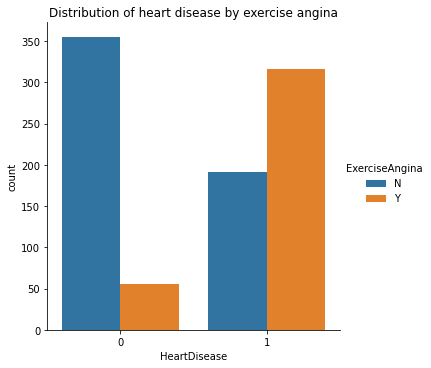

In [35]:
# full data set
sns.catplot(data = df, x = 'HeartDisease', hue = 'ExerciseAngina', kind = 'count')
plt.title('Distribution of heart disease by exercise angina')
plt.show()

In [36]:
#Table of fasting blood sugar level proportions with and without heart disease
prop_n = (np.sum(df[df['HeartDisease'] == 0]['ExerciseAngina'] == 'N') / len(df[df['HeartDisease'] == 0]) * 100).round(2)
prop_y = (np.sum(df[df['HeartDisease'] == 0]['ExerciseAngina'] == 'Y') / len(df[df['HeartDisease'] == 0]) * 100).round(2)
prop_n_hd = (np.sum(df[df['HeartDisease'] == 1]['ExerciseAngina'] == 'N') / len(df[df['HeartDisease'] == 1]) * 100).round(2)
prop_y_hd = (np.sum(df[df['HeartDisease'] == 1]['ExerciseAngina'] == 'Y') / len(df[df['HeartDisease'] == 1]) * 100).round(2)

data = {'No exercise angina': [prop_n, prop_n_hd], 'Angina': [prop_y, prop_y_hd]}
index = ['Proportion no heart disease', 'Proportion with heart disease']

table = pd.DataFrame(data = data, index = index)
table

,No exercise angina,Angina
Proportion no heart disease,86.59,13.41
Proportion with heart disease,37.67,62.33


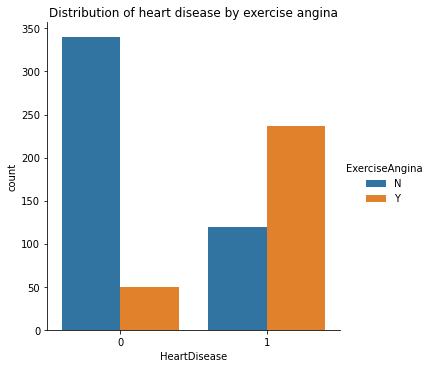

In [37]:
# Without Swiss data.
sns.catplot(data = df_dropped_chol, x = 'HeartDisease', hue = 'ExerciseAngina', kind = 'count')
plt.title('Distribution of heart disease by exercise angina')
plt.show()

In [38]:
# Without Swiss data.
prop_n = (np.sum(df_dropped_chol[df_dropped_chol['HeartDisease'] == 0]['ExerciseAngina'] == 'N') / 
          len(df_dropped_chol[df_dropped_chol['HeartDisease'] == 0]) * 100).round(2)
prop_y = (np.sum(df_dropped_chol[df_dropped_chol['HeartDisease'] == 0]['ExerciseAngina'] == 'Y') / 
          len(df_dropped_chol[df_dropped_chol['HeartDisease'] == 0]) * 100).round(2)
prop_n_hd = (np.sum(df_dropped_chol[df_dropped_chol['HeartDisease'] == 1]['ExerciseAngina'] == 'N') / 
             len(df_dropped_chol[df_dropped_chol['HeartDisease'] == 1]) * 100).round(2)
prop_y_hd = (np.sum(df_dropped_chol[df_dropped_chol['HeartDisease'] == 1]['ExerciseAngina'] == 'Y') / 
             len(df_dropped_chol[df_dropped_chol['HeartDisease'] == 1]) * 100).round(2)

data = {'No exercise angina': [prop_n, prop_n_hd], 'Angina': [prop_y, prop_y_hd]}
index = ['Proportion no heart disease', 'Proportion with heart disease']

table = pd.DataFrame(data = data, index = index)
table

,No exercise angina,Angina
Proportion no heart disease,87.18,12.82
Proportion with heart disease,33.43,66.57


### **2i: Heart Disease vs. Oldpeak**

Victims of heart disease have a greater amount of millimeters below the baseline for their old peak measurement than those who didn't have a heart disease.

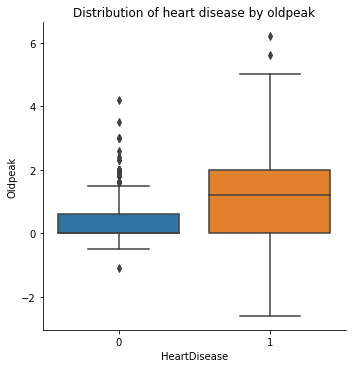

In [39]:
# Full dataset.
sns.catplot(data = df, x = 'HeartDisease', y = 'Oldpeak', kind = 'box')
plt.title('Distribution of heart disease by oldpeak')
plt.show()

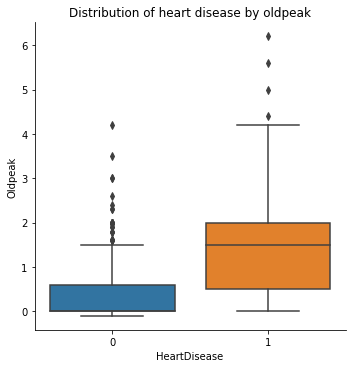

In [40]:
# Without Swiss.
sns.catplot(data = df_dropped_chol, x = 'HeartDisease', y = 'Oldpeak', kind = 'box')
plt.title('Distribution of heart disease by oldpeak')
plt.show()

### **2j: Heart Disease vs. ST slope**

The ST slope for victims of heart disease was overwhelmingly of the flat variety. People who didn't have a heart disease had an up ST slope most often.

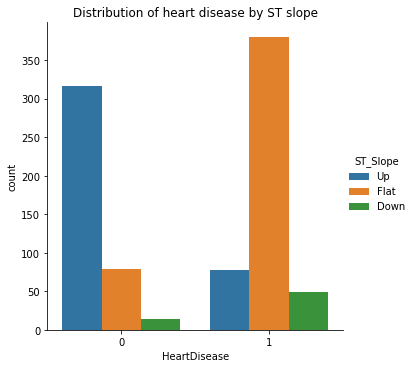

In [41]:
# Complete dataset
sns.catplot(data = df, x = 'HeartDisease', hue = 'ST_Slope', kind = 'count')
plt.title('Distribution of heart disease by ST slope')
plt.show()

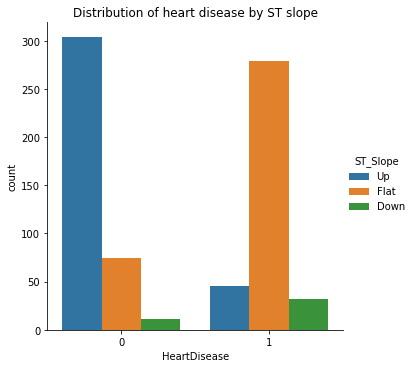

In [42]:
# Without Swiss
sns.catplot(data = df_dropped_chol, x = 'HeartDisease', hue = 'ST_Slope', kind = 'count')
plt.title('Distribution of heart disease by ST slope')
plt.show()

## **Section 3: Multi Variable Correlation**

Here we will represent the correlation between our independent variables and dependent variable all at once with a heat map. To accomplish this, we will need to one hot encode the sex, chest pain type, resting ECG, Exercise Angina, and ST_slope columns.

In [43]:
# Onehot encode the full data set using the pandas get_dummies method
ohe_encoded_full = pd.get_dummies(df)

In [44]:
# Observe that new columns have been created for each value of each categorical column.
ohe_encoded_full.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


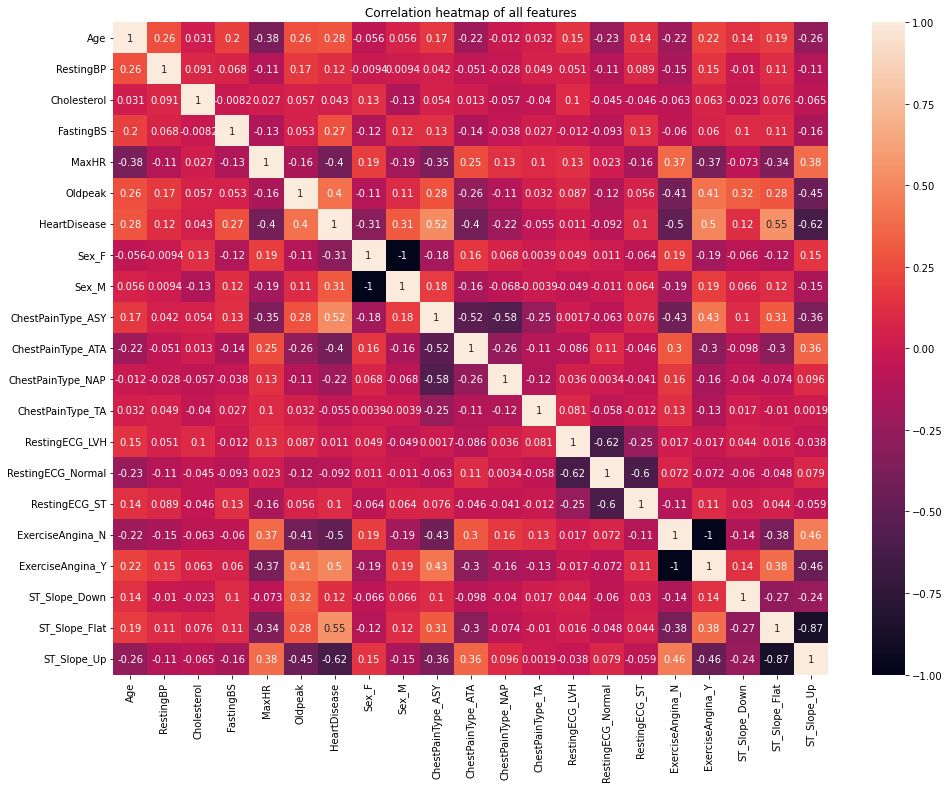

In [45]:
# View a heatmap showing correlation between all features.
plt.figure(figsize = (16,12))
sns.heatmap(ohe_encoded_full.corr(), annot = True)
plt.title('Correlation heatmap of all features')
plt.show()

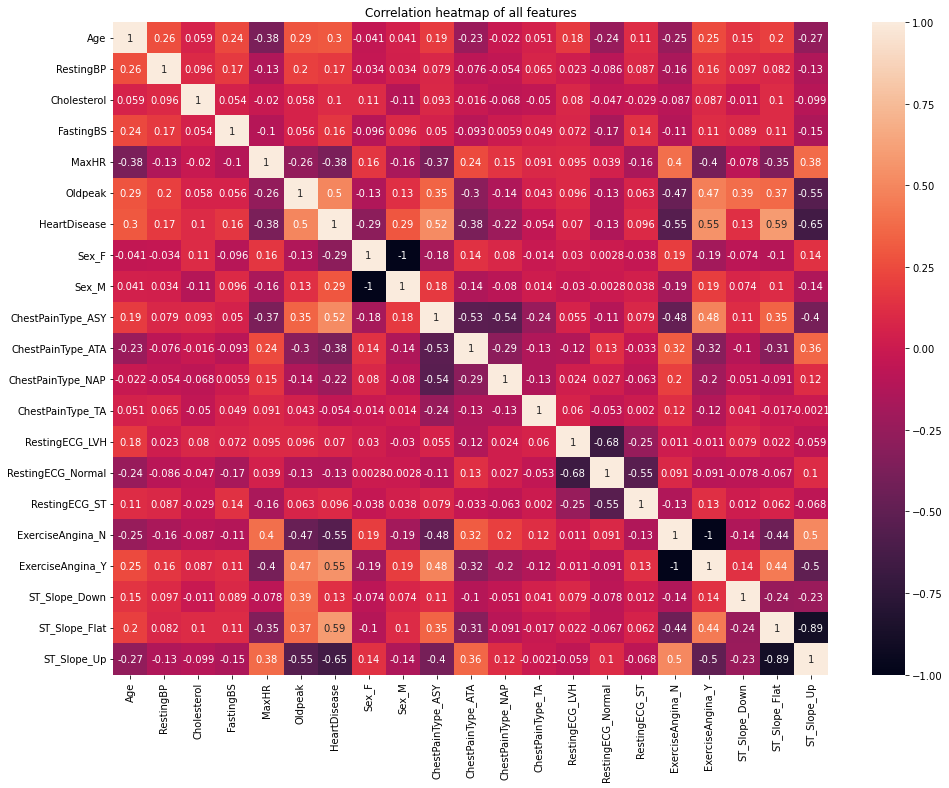

In [46]:
# Repeat the above for the data set without the Swiss data.
ohe_encoded_no_swiss = pd.get_dummies(df_dropped_chol)
plt.figure(figsize = (16,12))
sns.heatmap(ohe_encoded_no_swiss.corr(), annot = True)
plt.title('Correlation heatmap of all features')
plt.show()

Not too high of correlations here between features and heart disease. Some noteworthy (i.e. a magnitude of >= 0.5) pearson scores: 

### For full dataset:
- 0.5 for Exercise Angina yes.
- 0.52 for asymptomatic chest pain type.
- 0.55 for ST_slope Flat.
- -0.62 for ST_slope up.
- -0.5 for Exercise angina no.

### For dataset without the Swiss data:

- 0.5 for oldpeak.
- 0.52 for asymptomatic chest pain.
- 0.55 for Exercise Angina yes.
- 0.59 for ST_slope Flat.
- -0.65 for ST_slope up
- -0.55 for Exercise angina no.

Moving forward, it will be interesting to see how the model's feature importances will change depending on whether the data set is full or missing the values from Switzerland. I'm inclined to think the complete data set, with median cholesterol values imputed for the missing cholesterol values in the Swiss data, reveals something closer to a real relationship amongst the independent variables and heart disease. I have no reason to suspect that any of the other measurements for the Swiss data set are incorrect, just the cholesterol ones. And that Swiss data set had a very high rate of heart disease. This is peculiar on its own, but I think it's useful to have in the larger data set so that a model has more to factor into positive heart disease cases. 

With the data imputed, the greatest magnitude pearson value was ST slope up in the negative direction. What we might find, then, in the modeling section is that ST slope up is a strong predictor of not having heart disease.